In [1]:
import pandas as pd

In [2]:
#load MOMA artists database
df_moma_artists = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/main/Artists.csv')

In [3]:
#inspecting data
df_moma_artists.head(15595)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15590,138317,Humberto Crespo,NaN,NaN,male,0,0,NaN,NaN
15591,138318,Angelo González,NaN,NaN,male,0,0,NaN,NaN
15592,138319,Roy Battiste,NaN,NaN,male,0,0,NaN,NaN
15593,138320,(Moses) Anthony Figueroa,NaN,NaN,NaN,0,0,NaN,NaN


In [4]:
#Calculate missing values inside data frame
missing_values = df_moma_artists.isnull().sum()
missing_percentage = (df_moma_artists.isnull().sum() / len(df_moma_artists)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage' : missing_percentage
})
print(missing_summary)

               Missing Values  Percentage
ConstituentID               0    0.000000
DisplayName                 0    0.000000
ArtistBio                2194   14.067710
Nationality              2488   15.952808
Gender                   3243   20.793793
BeginDate                   0    0.000000
EndDate                     0    0.000000
Wiki QID                12349   79.180559
ULAN                    12665   81.206720


In [5]:
#summarize data
df_moma_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15596 entries, 0 to 15595
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15596 non-null  int64  
 1   DisplayName    15596 non-null  object 
 2   ArtistBio      13402 non-null  object 
 3   Nationality    13108 non-null  object 
 4   Gender         12353 non-null  object 
 5   BeginDate      15596 non-null  int64  
 6   EndDate        15596 non-null  int64  
 7   Wiki QID       3247 non-null   object 
 8   ULAN           2931 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [6]:
#check data for any missing values using what Amir did in class to see if it's
#any different, it's not!
missing_values = df_moma_artists.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 ConstituentID        0
DisplayName          0
ArtistBio         2194
Nationality       2488
Gender            3243
BeginDate            0
EndDate              0
Wiki QID         12349
ULAN             12665
dtype: int64


In [7]:
df_moma_artists.Gender.unique()

array(['male', 'female', nan, 'unknown. (non-binary or trans?)',
       'gender non-conforming', 'non-binary', 'transgender woman',
       'female (transwoman)'], dtype=object)

In [8]:
#Make sure Begin Date is in the correct format across all data
if 'BeginDate' in df_moma_artists.columns:
  df_moma_artists['BeginDate'] = pd.to_datetime(df_moma_artists['BeginDate'],
                                                errors='coerce')
  print("\nData Types After Conversion:\n", df_moma_artists.dtypes)


Data Types After Conversion:
 ConstituentID             int64
DisplayName              object
ArtistBio                object
Nationality              object
Gender                   object
BeginDate        datetime64[ns]
EndDate                   int64
Wiki QID                 object
ULAN                    float64
dtype: object


In [9]:
#Make sure End Date is in the correct format across all data
if 'EndDate' in df_moma_artists.columns:
  df_moma_artists['EndDate'] = pd.to_datetime(df_moma_artists['EndDate'],
  errors='coerce')
  print("\nData Types After Conversion:\n", df_moma_artists.dtypes)


Data Types After Conversion:
 ConstituentID             int64
DisplayName              object
ArtistBio                object
Nationality              object
Gender                   object
BeginDate        datetime64[ns]
EndDate          datetime64[ns]
Wiki QID                 object
ULAN                    float64
dtype: object


In [10]:
df_moma_artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1970-01-01 00:00:00.000001930,1970-01-01 00:00:00.000001992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1970-01-01 00:00:00.000001936,1970-01-01 00:00:00.000000000,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1970-01-01 00:00:00.000001941,1970-01-01 00:00:00.000000000,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1970-01-01 00:00:00.000001946,1970-01-01 00:00:00.000000000,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1970-01-01 00:00:00.000001941,1970-01-01 00:00:00.000000000,NaN,NaN


In [11]:
#check data for any potential duplicates
duplicates = df_moma_artists[df_moma_artists.duplicated]
print("Duplicates:\n", duplicates)

Duplicates:
 Empty DataFrame
Columns: [ConstituentID, DisplayName, ArtistBio, Nationality, Gender, BeginDate, EndDate, Wiki QID, ULAN]
Index: []


In [12]:
#Examine column Artist Bio
df_moma_artists['ArtistBio']

,ArtistBio
0,"American, 1930–1992"
1,"Spanish, born 1936"
2,"American, born 1941"
3,"American, born 1946"
4,"Danish, born 1941"
...,...
15591,NaN
15592,NaN
15593,NaN
15594,NaN


In [13]:
#Examine column Nationality
df_moma_artists['Nationality']

,Nationality
0,American
1,Spanish
2,American
3,American
4,Danish
...,...
15591,NaN
15592,NaN
15593,NaN
15594,NaN


In [14]:
#Figure out how many different nationalities exist
column_data = df_moma_artists['Nationality']
num_unique_strings = column_data.nunique()
print(f'The number of unique strings in the column is: {num_unique_strings}')

The number of unique strings in the column is: 128


In [15]:
#List the different nationalities by name
column_data = df_moma_artists['Nationality']
unique_strings = column_data.unique()
print(f'The unique strings in the column are: {unique_strings}')

The unique strings in the column are: ['American' 'Spanish' 'Danish' 'Italian' 'French' 'Estonian' 'Mexican'
 'Swedish' nan 'Israeli' 'British' 'Finnish' 'Polish' 'Palestinian'
 'Japanese' 'Guatemalan' 'Colombian' 'Romanian' 'Russian' 'German'
 'Argentine' 'Kuwaiti' 'Belgian' 'Dutch' 'Norwegian' 'Nationality unknown'
 'Chilean' 'Swiss' 'Costa Rican' 'Czech' 'Brazilian' 'Austrian' 'Canadian'
 'Australian' 'Ukrainian' 'Hungarian' 'Haitian' 'Congolese' 'Bolivian'
 'Cuban' 'Slovenian' 'Portuguese' 'Indian' 'Peruvian' 'Icelandic' 'Irish'
 'Croatian' 'Uruguayan' 'Slovak' 'Greek' 'Serbian' 'Chinese' 'Venezuelan'
 'Native American' 'Turkish' 'Panamanian' 'Algerian' 'Ecuadorian'
 'South African' 'Iranian' 'Puerto Rican' 'Korean' 'Canadian Inuit'
 'Paraguayan' 'Luxembourger' 'Nicaraguan' 'Zimbabwean' 'Moroccan'
 'Tanzanian' 'Bulgarian' 'Tunisian' 'Sudanese' 'Taiwanese' 'Ethiopian'
 'Yugoslav' 'Scottish' 'Latvian' 'Azerbaijani' 'Senegalese' 'Thai'
 'New Zealander' 'Lithuanian' 'Pakistani' 'Bahami

In [16]:
#Import Numpy
import numpy as np

In [17]:
#Import Matplotlib
import matplotlib.pyplot as plt

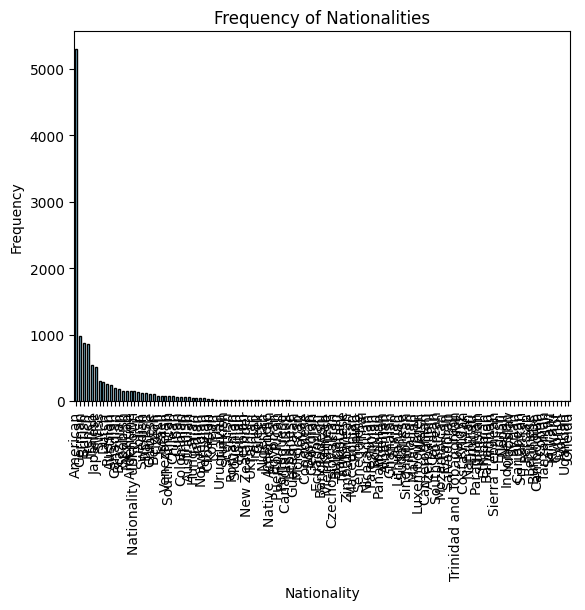

In [18]:
#Plot list as bar chart
value_counts = df_moma_artists['Nationality'].value_counts()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()

In [19]:
#List the frequency of each nationality
nationality_counts = df_moma_artists['Nationality'].value_counts()
nationality_counts_list = nationality_counts.tolist()
print(nationality_counts_list)

[5298, 980, 872, 862, 538, 509, 298, 282, 261, 242, 194, 175, 159, 154, 150, 146, 132, 129, 123, 107, 101, 84, 75, 72, 71, 71, 64, 63, 62, 57, 54, 52, 49, 41, 35, 32, 24, 23, 22, 20, 19, 17, 17, 17, 16, 15, 14, 13, 13, 12, 12, 11, 11, 10, 10, 10, 8, 8, 8, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [20]:
from pprint import pprint

In [21]:
#Include the NAME of the nationality in the frequency list
nationality_and_counts = list(zip(nationality_counts.index.tolist(), nationality_counts.tolist()))
pprint(nationality_and_counts)

[('American', 5298),
 ('German', 980),
 ('British', 872),
 ('French', 862),
 ('Italian', 538),
 ('Japanese', 509),
 ('Swiss', 298),
 ('Dutch', 282),
 ('Russian', 261),
 ('Austrian', 242),
 ('Canadian', 194),
 ('Brazilian', 175),
 ('Spanish', 159),
 ('Mexican', 154),
 ('Argentine', 150),
 ('Nationality unknown', 146),
 ('Polish', 132),
 ('Swedish', 129),
 ('Danish', 123),
 ('Chinese', 107),
 ('Belgian', 101),
 ('Czech', 84),
 ('Israeli', 75),
 ('Venezuelan', 72),
 ('South African', 71),
 ('Chilean', 71),
 ('Cuban', 64),
 ('Colombian', 63),
 ('Finnish', 62),
 ('Australian', 57),
 ('Hungarian', 54),
 ('Indian', 52),
 ('Norwegian', 49),
 ('Peruvian', 41),
 ('Croatian', 35),
 ('Korean', 32),
 ('Irish', 24),
 ('Uruguayan', 23),
 ('Turkish', 22),
 ('Scottish', 20),
 ('Romanian', 19),
 ('Slovenian', 17),
 ('Haitian', 17),
 ('Serbian', 17),
 ('New Zealander', 16),
 ('Ukrainian', 15),
 ('Iranian', 14),
 ('Greek', 13),
 ('Nigerian', 13),
 ('Icelandic', 12),
 ('Native American', 12),
 ('Egyptian',

In [22]:
#Calculate the same data as above but friendly to chart-building
nationality_and_counts = df_moma_artists['Nationality'].value_counts()

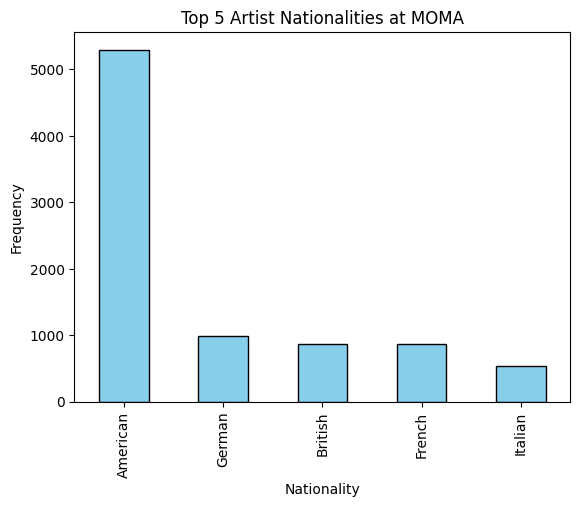

In [23]:
#Build chart of top 5 artist nationalities
top_5 = nationality_and_counts.head(5)
top_5.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Artist Nationalities at MOMA")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.show()

In [24]:
import seaborn as sns

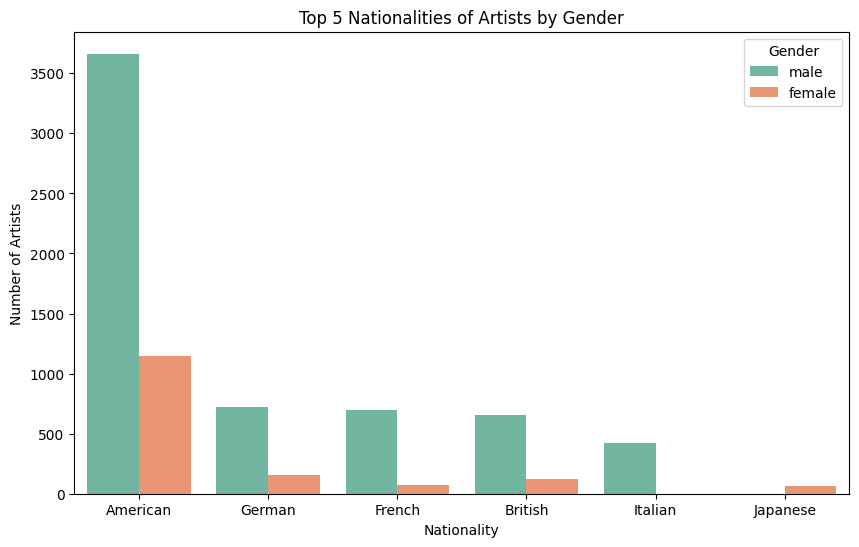

In [25]:
#Calculate top 5 artist nationalities by gender
nationality_gender_counts = df_moma_artists.groupby(['Nationality', 'Gender']).size().reset_index(name='count')
top_5_male = nationality_gender_counts[nationality_gender_counts['Gender'] == 'male'].nlargest(5, 'count')
top_5_female = nationality_gender_counts[nationality_gender_counts['Gender'] == 'female'].nlargest(5, 'count')
top_5 = pd.concat([top_5_male, top_5_female])
plt.figure(figsize=(10, 6))
sns.barplot(x='Nationality', y='count', hue='Gender', data=top_5, palette='Set2')

#Build chart comparing top 5 artist nationalities by gender
plt.title('Top 5 Nationalities of Artists by Gender')
plt.xlabel('Nationality')
plt.ylabel('Number of Artists')
plt.show()

In [26]:
#Load in Artworks database
df_moma_artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/refs/heads/main/Artworks.csv')

In [27]:
#inspecting data
df_moma_artworks

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156629,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156630,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156631,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156632,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Check for missing values
missing_values = df_moma_artworks.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 Title                     48
Artist                  1261
ConstituentID           1261
ArtistBio               6078
Nationality             1261
BeginDate               1261
EndDate                 1261
Gender                  1261
Date                    2016
Medium                  9254
Dimensions              8644
CreditLine              1523
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            6786
Cataloged                  0
ObjectID                   0
URL                    56624
ImageURL               65960
OnView                155393
Circumference (cm)    156624
Depth (cm)            138819
Diameter (cm)         155165
Height (cm)            28748
Length (cm)           155923
Weight (kg)           156338
Width (cm)             29675
Seat Height (cm)      156634
Duration (sec.)       154681
dtype: int64


In [29]:
df_moma_artworks.BeginDate.head(20)

,BeginDate
0,(1841)
1,(1944)
2,(1876)
3,(1944)
4,(1876)
5,(1944)
6,(1944)
7,(1944)
8,(1944)
9,(1944)


In [30]:
df_moma_artworks['BeginDate'] = pd.to_datetime(df_moma_artworks['BeginDate'], format='(%Y)', errors='coerce').dt.year

In [31]:
#Examine all numeric columns
numeric_columns = df_moma_artworks.select_dtypes(include=['datetime64', 'float64'
  ]).columns

In [32]:
df_moma_artworks.BeginDate.head(20)

,BeginDate
0,1841.0
1,1944.0
2,1876.0
3,1944.0
4,1876.0
5,1944.0
6,1944.0
7,1944.0
8,1944.0
9,1944.0


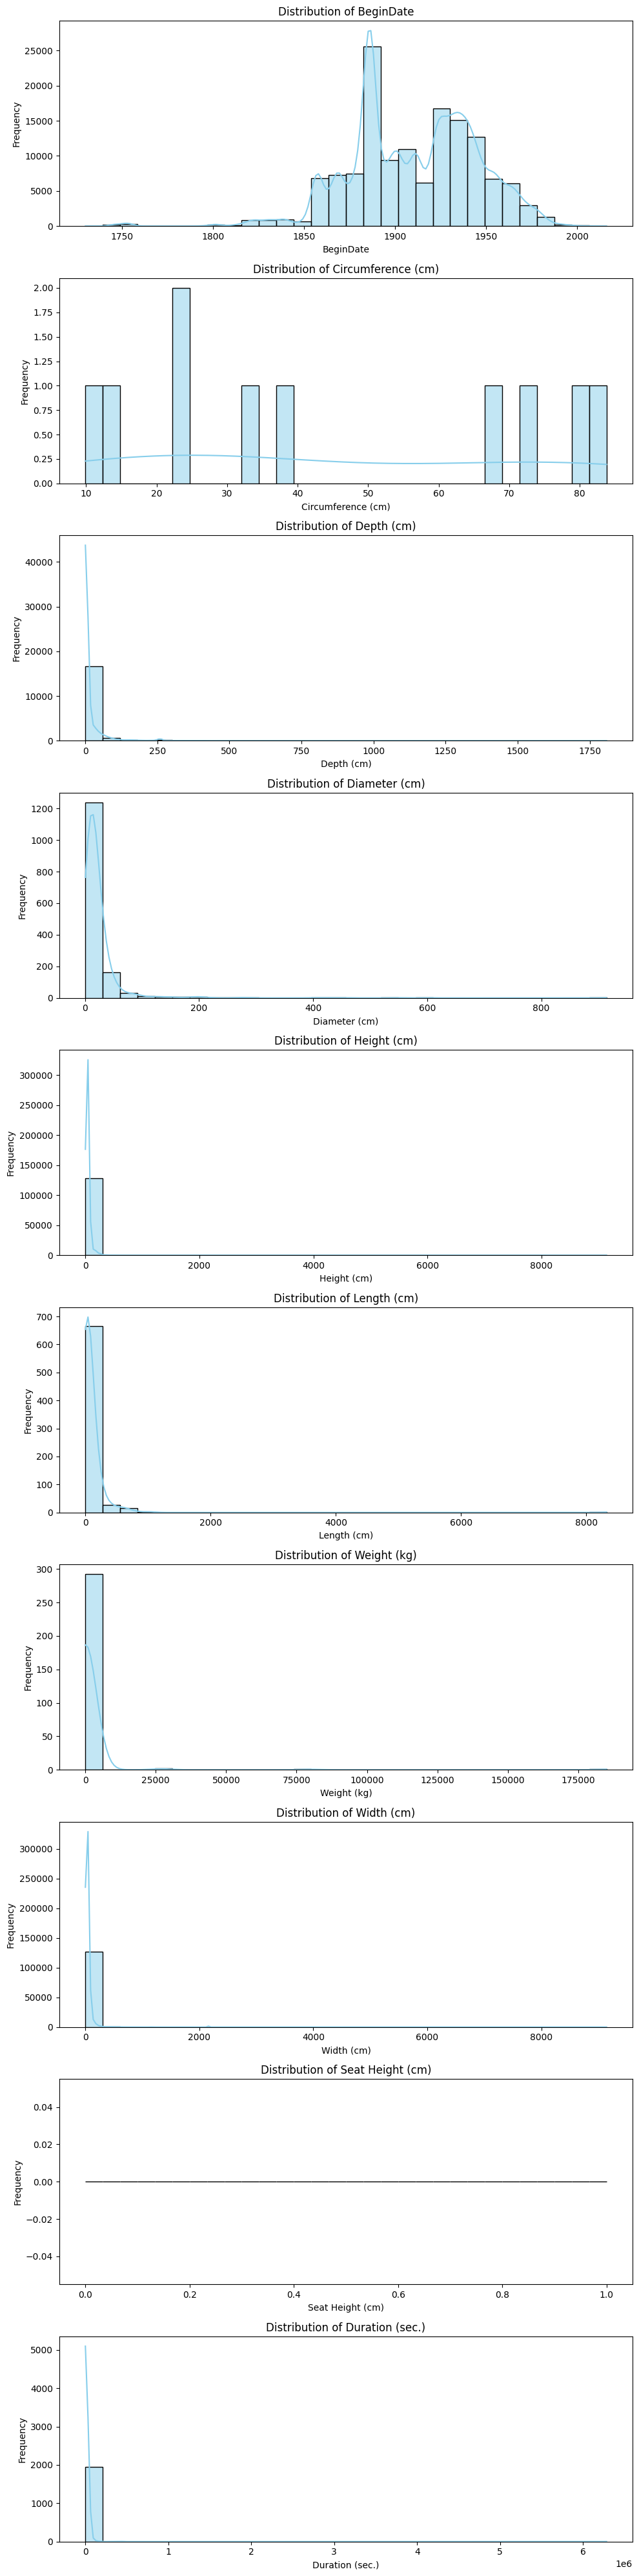

In [33]:
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, len(numeric_columns) * 4))
for i, column in enumerate(numeric_columns):
    sns.histplot(df_moma_artworks[column], kde=True, color='skyblue', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [34]:
#Do less data
#Examine all datetime
datetime_columns = df_moma_artworks.select_dtypes(include=['datetime64']).columns
plt.figure(figsize=(10, 20))
for i, column in enumerate(datetime_columns, 1):
  plt.subplot(len(datetime_columns), 1, i)
  sns.histplot(df_moma_artworks[column], kde=True, color='green', bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show

<Figure size 1000x2000 with 0 Axes>

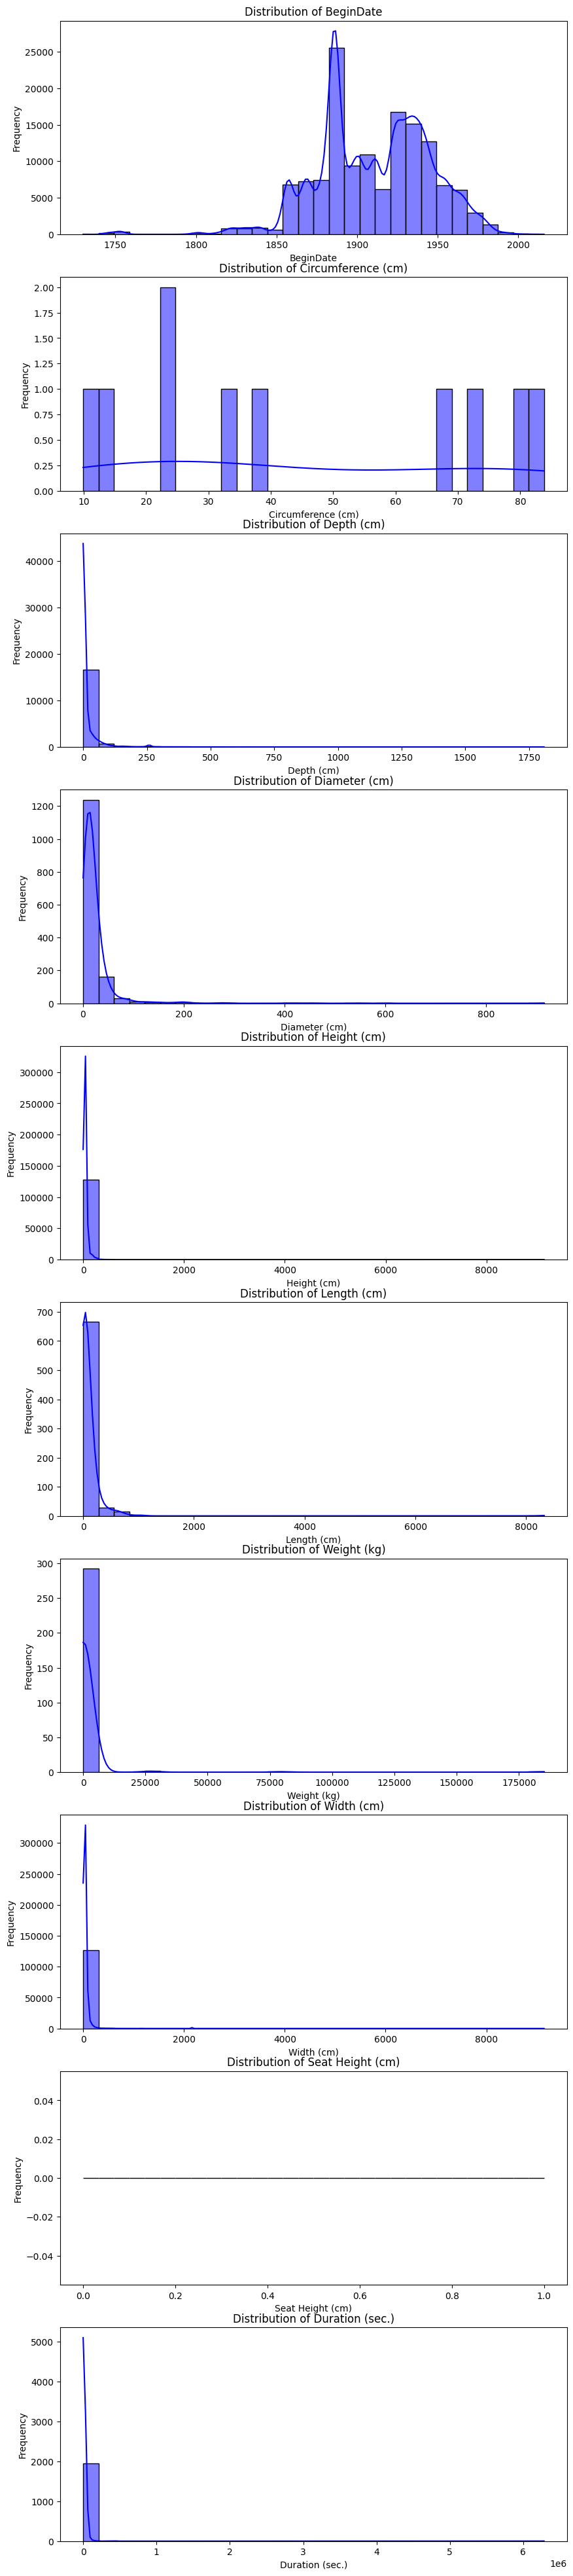

In [35]:
#Examine all float numbers
float_columns = df_moma_artworks.select_dtypes(include=['float64']).columns
plt.figure(figsize=(10, 50))
for i, column in enumerate(float_columns, 1):
  plt.subplot(len(float_columns), 1, i)
  sns.histplot(df_moma_artworks[column], kde=True, color='blue', bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show

In [36]:
#Couldn't merge Constituent IDs, checking to see how they are labeled
#in each dataset
print(df_moma_artworks.dtypes)
print(df_moma_artists.dtypes)

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate             float64
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ImageURL               object
OnView                 object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object
ConstituentID             int64
DisplayName              object
ArtistBio             

In [37]:
print(df_moma_artworks.ConstituentID.head())
print(df_moma_artists.ConstituentID.head())

0    6210
1    7470
2    7605
3    7056
4    7605
Name: ConstituentID, dtype: object
0    1
1    2
2    3
3    4
4    5
Name: ConstituentID, dtype: int64


In [38]:
df_moma_artworks['ConstituentID'] = pd.to_numeric(df_moma_artworks['ConstituentID'], errors='coerce')

In [39]:
df_moma_artworks['ConstituentID'].isnull().sum() / df_moma_artworks.shape[0]

0.05848666317657725

In [40]:
df_moma_artworks.shape[0]

156634

In [41]:
df_moma_artists['ConstituentID'] = df_moma_artists['ConstituentID'].astype(int)

In [42]:
merged_df = pd.merge(df_moma_artists, df_moma_artworks, on='ConstituentID')


In [43]:
merged_df.head()

,ConstituentID,DisplayName,ArtistBio_x,Nationality_x,Gender_x,BeginDate_x,EndDate_x,Wiki QID,ULAN,Title,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,1,Robert Arneson,"American, 1930–1992",American,male,1970-01-01 00:00:00.000001930,1970-01-01 00:00:00.000001992,NaN,NaN,Study for Head Bath,...,NaN,NaN,NaN,NaN,105.7,NaN,NaN,75.9,NaN,NaN
1,1,Robert Arneson,"American, 1930–1992",American,male,1970-01-01 00:00:00.000001930,1970-01-01 00:00:00.000001992,NaN,NaN,General Nuke,...,NaN,NaN,NaN,NaN,80.5,NaN,NaN,59.2,NaN,NaN
2,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1970-01-01 00:00:00.000001936,1970-01-01 00:00:00.000000000,NaN,NaN,BAS-RELIEF,...,NaN,NaN,NaN,NaN,54.7,NaN,NaN,39.7,NaN,NaN
3,3,Bill Arnold,"American, born 1941",American,male,1970-01-01 00:00:00.000001941,1970-01-01 00:00:00.000000000,NaN,NaN,Honey under Sink,...,NaN,NaN,NaN,NaN,38.1,NaN,NaN,58.2,NaN,NaN
4,3,Bill Arnold,"American, born 1941",American,male,1970-01-01 00:00:00.000001941,1970-01-01 00:00:00.000000000,NaN,NaN,Honey under Chair,...,NaN,NaN,NaN,NaN,38.1,NaN,NaN,57.8,NaN,NaN


In [44]:
#When we opened up the Gender column in the Artists DF, I was surprised to see how
#many other genders were listed besides Male + Female, particularly as those
#didn't show up in the "Nationality by Gender" (maybe because the percentage is
#too small?)
#My question is: what's the earliest recorded birth date of an artist by gender at Moma
earliest_birth_by_gender = df_moma_artists.groupby('Gender')['BeginDate'].min()

In [45]:
print(earliest_birth_by_gender)

Gender
female                            1970-01-01 00:00:00.000000000
female (transwoman)               1970-01-01 00:00:00.000001993
gender non-conforming             1970-01-01 00:00:00.000001975
male                              1970-01-01 00:00:00.000000000
non-binary                        1970-01-01 00:00:00.000001973
transgender woman                 1970-01-01 00:00:00.000001981
unknown. (non-binary or trans?)   1970-01-01 00:00:00.000001902
Name: BeginDate, dtype: datetime64[ns]


In [46]:
#I don't understand why it's showing up as all the same year when we clearly see
#in the chart that it begins earlier than that
pd.to_numeric(df_moma_artists['BeginDate'], errors='coerce')

,BeginDate
0,1930
1,1936
2,1941
3,1946
4,1941
...,...
15591,0
15592,0
15593,0
15594,0


In [53]:
#Wondering if this is because we merged the data, but even though we merged the
#data can't I still use the original Artists dataframe byitself because it's
#still named that and I'm not using the "merged" DF name that we created?
pd.to_datetime(df_moma_artists['BeginDate'], format='(%Y)', errors='coerce').dt.year

,BeginDate
0,1970
1,1970
2,1970
3,1970
4,1970
...,...
15591,1970
15592,1970
15593,1970
15594,1970


In [54]:
#Checking in another way for the BeginDate of the artists
np.array(df_moma_artists['BeginDate'], dtype='int64')

array([1930, 1936, 1941, ...,    0,    0, 2005])

In [55]:
arr = np.array(df_moma_artists['BeginDate'], dtype='int64')

In [56]:
#Converting the year to a float in case that will help
arr.astype('float')

array([1930., 1936., 1941., ...,    0.,    0., 2005.])

In [57]:
#Checking again and IT STILL DOESN'T WORK
df_moma_artists.BeginDate.head(20)

,BeginDate
0,1970-01-01 00:00:00.000001930
1,1970-01-01 00:00:00.000001936
2,1970-01-01 00:00:00.000001941
3,1970-01-01 00:00:00.000001946
4,1970-01-01 00:00:00.000001941
5,1970-01-01 00:00:00.000001925
6,1970-01-01 00:00:00.000001941
7,1970-01-01 00:00:00.000001923
8,1970-01-01 00:00:00.000001918
9,1970-01-01 00:00:00.000001886


<Axes: xlabel='Gender'>

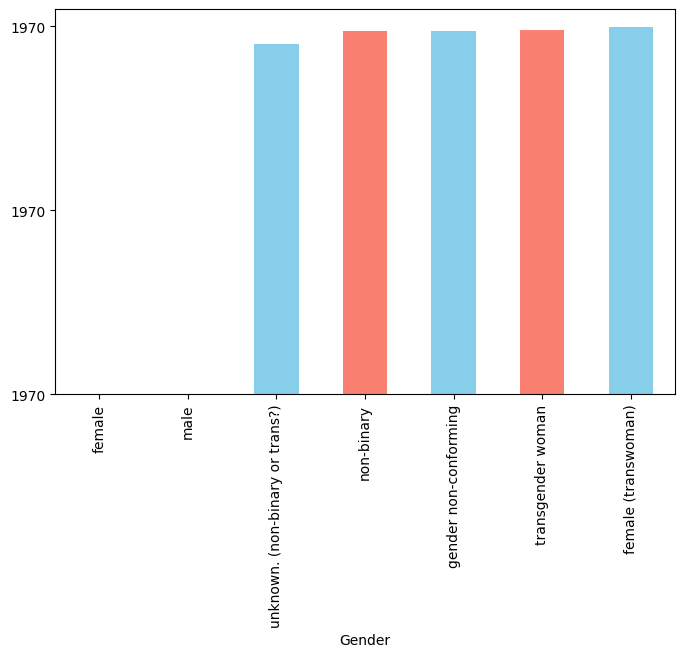

In [50]:
#Plotting anyways at this point but it's not showing me what I want to see
#because it's still using the 1970 blanket start year, which I see in the
#merged data but I still don't understand why I can't use the Artists DF by
#itself since the Merged DF is labeled differently?
plt.figure(figsize=(8, 5))
earliest_birth_by_gender = earliest_birth_by_gender.sort_values(ascending=True)
earliest_birth_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])